## 기울기
앞의 예에서는 $x_0$와 $x_1$ 의 편미분을 변수별로 따로 계산했다.
그럼 $x_0$와 $x_1$의 편미분을 동시에 계산하려면 어떻게 해야할까?
가령 $x_0 =3 ,x_1=4$ 일 때 $(x_0,x_1)$ 양쪽의 편미분을 묶어서 $(\frac{\partial f}{\partial x_0},\frac{\partial f}{\partial x_1})$ 을 계산 한다고 생각해 볼때, 모든 변수의 편미분을 벡터로 정리한 것을 기울기라고 한다.

In [1]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        #f(x+h)계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        #f(x-h)계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad

numerical_gradient(f,x) 함수의 구현은 좀 복잡하게 보이지만, 동작 방식은 변수가 하나일때의 수치 미분과 거의 같다.

In [2]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

print(numerical_gradient(function_2,np.array([3.0,4.0])))
print(numerical_gradient(function_2,np.array([0.0,2.0])))
print(numerical_gradient(function_2,np.array([3.0,0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


In [3]:
def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-4.  -3.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0. 

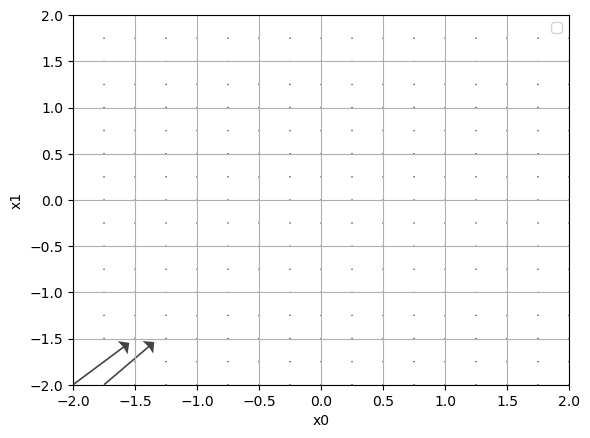

In [4]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            print(_numerical_gradient_no_batch(f, x))
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad

x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]) )
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

In [5]:
"

SyntaxError: unterminated string literal (detected at line 1) (1845220801.py, line 1)